### Imports

In [2]:
from definitions import *
import sys
sys.path.append("../../llama/llama/")
from tokenizer import Tokenizer

### Experiment with Llama 2 tokenizer

In [3]:
tokenizer = Tokenizer("../../llama/tokenizer.model")

In [5]:
tokenizer.encode("hello, how are you doing?", bos=True, eos=True)

[1, 22172, 29892, 920, 526, 366, 2599, 29973, 2]

In [9]:
tokenizer.decode([1, 22172, 29892, 920, 526, 366, 2599, 29973, 2])

'hello, how are you doing?'

In [10]:
tokenizer.encode("Привет, как дела?", bos=True, eos=True)

[1, 7203, 7616, 29892, 5413, 24280, 29973, 2]

In [11]:
tokenizer.decode([[1, 7203, 7616, 29892, 5413, 24280, 29973, 2]])

['Привет, как дела?']

In [16]:
num_tokens = 0
with open("../artifacts/book_full_texts/war_and_peace.txt", "r") as f:
    for x in tqdm(f.readlines(), desc="Iterating through war and peace lines"):
        num_tokens += len(tokenizer.encode(x, False, False))
print(num_tokens)

Iterating through war and peace lines: 100%|██████████| 24010/24010 [00:01<00:00, 20822.57it/s]

1456183


In [20]:
dir_path = Path("../artifacts/book_full_texts/")
book_to_tokens = dict()
for file in dir_path.glob("*.txt"):
    with open(file, "r") as f:
        num_tokens = len(tokenizer.encode(f.read(), False, False))
    book_to_tokens[file.stem] = num_tokens

In [82]:
with open("../artifacts/tokens/books/llama-2.json", "w") as f:
    json.dump(book_to_tokens, f, indent=2, ensure_ascii=False)

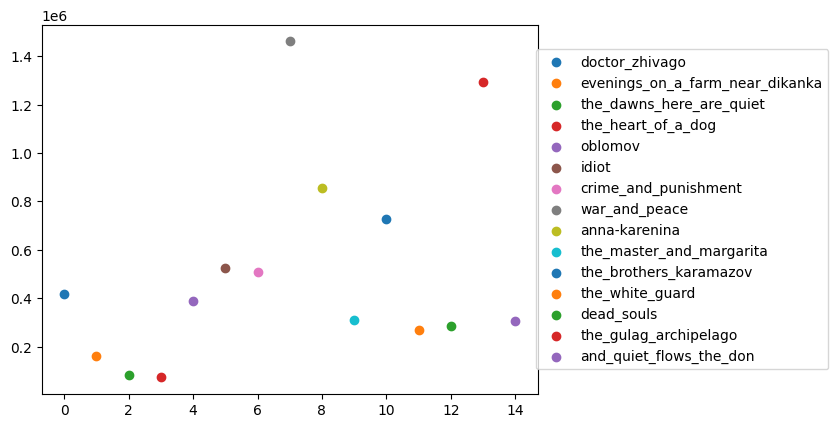

In [68]:
import matplotlib.pyplot as plt

for i, (book, num_tokens) in enumerate(book_to_tokens.items()):
    plt.scatter(i, num_tokens, label=book)
plt.legend(loc='right', bbox_to_anchor=(1.6, 0.5))

{'whiskers': [<matplotlib.lines.Line2D at 0x31f6ed610>,
 'caps': [<matplotlib.lines.Line2D at 0x31f6ee990>,
 'boxes': [<matplotlib.lines.Line2D at 0x31f6ece10>,
 'medians': [<matplotlib.lines.Line2D at 0x31f6ef910>,
 'fliers': [<matplotlib.lines.Line2D at 0x31f6f8290>,
 'means': []}

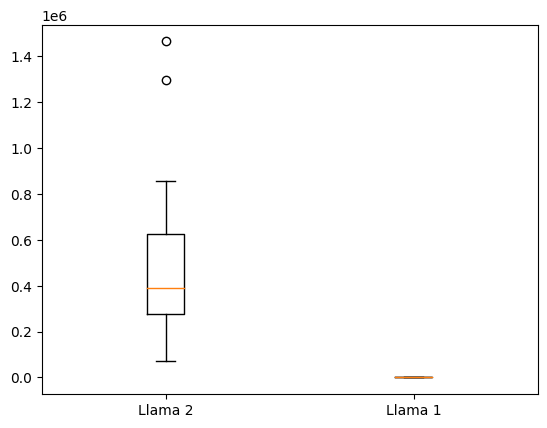

In [80]:
plt.boxplot([list(book_to_tokens.values()), [0, 1, 2]], labels=["Llama 2", "Llama 1"])

In [73]:
np.mean(list(book_to_tokens.values()))

510263.6666666667

### Experiment with Llama 3 tokenizer

In [1]:
from definitions import *
sys.path.append("../../llama3/llama")

In [2]:
from tokenizer import Tokenizer

In [6]:
tokenizer = Tokenizer("../../llama3/Meta-Llama-3-8B/tokenizer.model")

In [10]:
tokenizer.encode("Hi, how are you?", bos=False, eos=False)

[13347, 11, 1268, 527, 499, 30]

In [11]:
tokenizer.decode([13347, 11, 1268, 527, 499, 30])

'Hi, how are you?'

In [13]:
dir_path = Path("../artifacts/book_full_texts/")
book_to_tokens = dict()
for file in dir_path.glob("*.txt"):
    with open(file, "r") as f:
        num_tokens = len(tokenizer.encode(f.read(), bos=False, eos=False))
    book_to_tokens[file.stem] = num_tokens

In [14]:
with open("../artifacts/tokens/books/llama-3.json", "w") as f:
    json.dump(book_to_tokens, f, indent=2, ensure_ascii=False)

### Combine different tokenizers

{'whiskers': [<matplotlib.lines.Line2D at 0x17cb2fdd0>,
 'caps': [<matplotlib.lines.Line2D at 0x17cd5a390>,
 'boxes': [<matplotlib.lines.Line2D at 0x17cd06c90>,
 'medians': [<matplotlib.lines.Line2D at 0x17cd5ba10>,
 'fliers': [<matplotlib.lines.Line2D at 0x17cd30dd0>,
 'means': []}

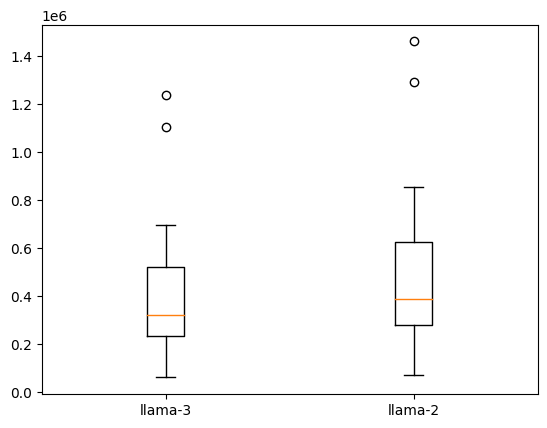

In [16]:
import matplotlib.pyplot as plt

values = []
labels = []
for file in Path("../artifacts/tokens/books/").glob("*"):
    labels.append(file.stem)
    with open(file, "r") as f:
        values.append(list(json.load(f).values()))
plt.boxplot(values, labels=labels)